In [4]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
import yfinance as yf

# Define the S&P 500 ticker
ticker = "^GSPC"

# Download data, for example, from 2010 to the present
sp500_data = yf.download(ticker, start="2010-01-01", end="2023-12-31")

# Display the data
print(sp500_data)


[*********************100%***********************]  1 of 1 completed

                             Adj Close        Close         High          Low  \
Date                                                                            
2010-01-04 00:00:00+00:00  1132.989990  1132.989990  1133.869995  1116.560059   
2010-01-05 00:00:00+00:00  1136.520020  1136.520020  1136.630005  1129.660034   
2010-01-06 00:00:00+00:00  1137.140015  1137.140015  1139.189941  1133.949951   
2010-01-07 00:00:00+00:00  1141.689941  1141.689941  1142.459961  1131.319946   
2010-01-08 00:00:00+00:00  1144.979980  1144.979980  1145.390015  1136.219971   
...                                ...          ...          ...          ...   
2023-12-22 00:00:00+00:00  4754.629883  4754.629883  4772.939941  4736.770020   
2023-12-26 00:00:00+00:00  4774.750000  4774.750000  4784.720215  4758.450195   
2023-12-27 00:00:00+00:00  4781.580078  4781.580078  4785.390137  4768.899902   
2023-12-28 00:00:00+00:00  4783.350098  4783.350098  4793.299805  4780.979980   
2023-12-29 00:00:00+00:00  4

In [6]:
sp500_data.to_csv("sp500_data.csv")


In [8]:
df=pd.read_csv("sp500_data.csv")
df.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04 00:00:00+00:00,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
1,2010-01-05 00:00:00+00:00,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2,2010-01-06 00:00:00+00:00,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
3,2010-01-07 00:00:00+00:00,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
4,2010-01-08 00:00:00+00:00,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [10]:
df.drop("Adj Close", axis=1, errors='ignore', inplace=True)

In [11]:
df.head(5)

,Date,Close,High,Low,Open,Volume
0,2010-01-04 00:00:00+00:00,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
1,2010-01-05 00:00:00+00:00,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2,2010-01-06 00:00:00+00:00,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
3,2010-01-07 00:00:00+00:00,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
4,2010-01-08 00:00:00+00:00,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [12]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-16.429932,17.309937
1,-3.859985,6.969971
2,-1.430054,5.239990
3,-5.419922,11.140015
4,-4.459961,9.170044


In [14]:
#np.where(condition, value_if_true, value_if_false)
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Print y
y

array([1, 1, 1, ..., 1, 0, 0])

In [15]:
# Define the split percentage
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [16]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [17]:
y_predict = cls.predict(X_test)

In [18]:
# train and test accuracy
accuracy_test = accuracy_score(y_test, y_predict)

print('Accuracy:{: .2f}%'.format(accuracy_test*100))

Accuracy: 52.06%


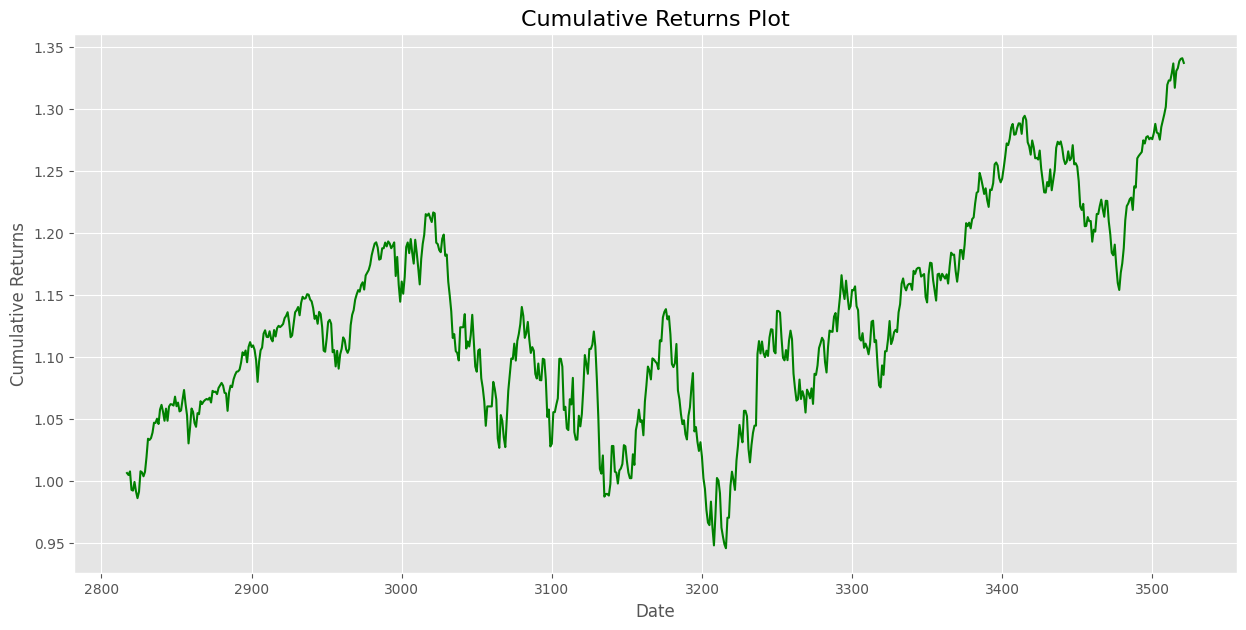

In [19]:
# Predicted Signal
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Returns'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Returns'] = df.Returns * df.Predicted_Signal.shift(1)

# Calculate geometric returns
df['cumulative_returns'] = (df.Strategy_Returns.iloc[split:]+1).cumprod()

# Set the title and axis labels
plt.title("Cumulative Returns Plot", fontsize=16)
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")

# Plot geometric returns
df['cumulative_returns'].plot(figsize=(15, 7),color='g')

plt.show()